In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns

In [2]:
df = pd.read_csv("tip.csv")
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [5]:
df.empty

False

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(244, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# ✅ 1. Basic Insights (Descriptive Statistics)
# You can compute:
# 	• Average tip
# 	• Average total bill
# 	• Tip percentage distribution
# 	• Most common visiting day
# 	• Most common visiting time (Lunch vs Dinner)
# 	• Average party size
# ✅ These help understand the general behavior of customers.

In [12]:
print("Average tips:",df['tip'].mean())
print("Average total bill:", df['total_bill'].mean())

df['tip_percentage'] = (df['tip']/df['total_bill']) * 100
df.head()

Average tips: 2.99827868852459
Average total bill: 19.78594262295082


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


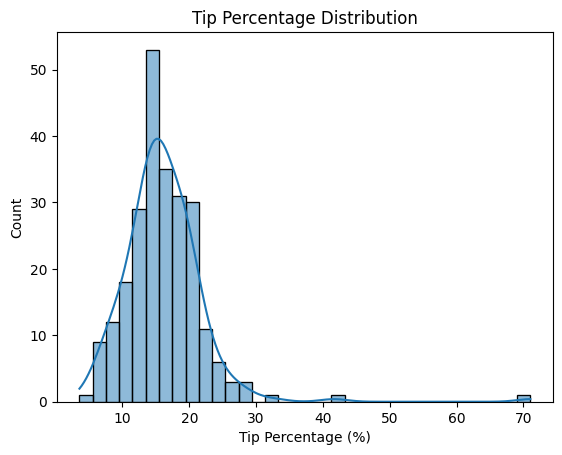

In [13]:
# tip percentage distribution
import seaborn as sns
sns.histplot(df['tip_percentage'], kde=True)
plt.title("Tip Percentage Distribution")
plt.xlabel("Tip Percentage (%)")
plt.show()

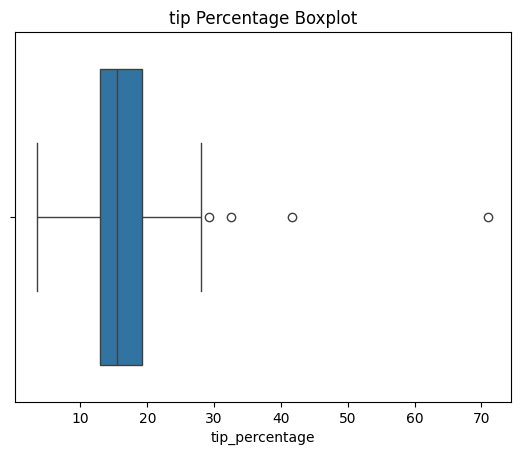

In [14]:
# Boxplot(for outliers)
sns.boxplot(x=df['tip_percentage'])
plt.title("tip Percentage Boxplot")
plt.show()

In [15]:
print("Tip Percentage",df['tip_percentage'].max())
print("Minimum Tip Percentage", df['tip_percentage'].min())

Tip Percentage 71.0344827586207
Minimum Tip Percentage 3.563813585135547


In [16]:
# 	• Most common visiting day
most_common_day = df['day'].mode()[0]
print("Most common visiting day:", most_common_day)
# 	• Most common visiting time (Lunch vs Dinner)
most_common_time = df['time'].mode()[0]
print("Most common visiting time:", most_common_time)
# 	• Average party size
average_party_size = df['size'].mean()
print("Average party size:", average_party_size)

Most common visiting day: Sat
Most common visiting time: Dinner
Average party size: 2.569672131147541


In [17]:
# ✅ 2. Tip Percentage Analysis
# Calculate:
# 	• Tip % = (tip / total_bill) × 100
# Then analyze:
# 	• What is the most common tip percentage?
# 	• Do customers tip more during dinner than lunch?
# 	• Are tips higher on weekends?
# ✅ This is one of the most important insights.


In [18]:
# 	• What is the most common tip percentage?
most_common_tip_percentage = df['tip_percentage'].mode()[0]
print("Most common tip percentage:", most_common_tip_percentage)
# 	• Do customers tip more during dinner than lunch?
avg_tip_lunch = df[df['time'] == 'Lunch']['tip_percentage'].mean()
avg_tip_dinner = df[df['time'] == 'Dinner']['tip_percentage'].mean()
print("Average tip lunch:", avg_tip_lunch)
print("Average tip dinner:", avg_tip_dinner)

# During the lunch customers give more tips than dinner.


Most common tip percentage: 14.482259232440258
Average tip lunch: 16.412792816250498
Average tip dinner: 15.951778877977734


In [19]:
# 	• Are tips higher on weekends?
avg_tip_weekend = df[df['day'].isin(['Sat', 'Sun'])]['tip_percentage'].mean() # isin() => to check multiple values in a column
avg_tip_weekday = df[~df['day'].isin(['Sat', 'Sun'])]['tip_percentage'].mean()
print("Average tip weekend:", avg_tip_weekend)
print("Average tip weekday:", avg_tip_weekday)
if avg_tip_weekend > avg_tip_weekend:
    print("Tips are higher on weekend")
else:
    print("tips are higher on weekday")

Average tip weekend: 15.95606937940057
Average tip weekday: 16.330168952923728
tips are higher on weekday


In [20]:
# ✅ 3. Effect of Customer Gender
# You can analyze:
# 	• Do males tip more than females?
# 	• Compare both:
# 		○ Tip amount
# 		○ Tip percentage
# ✅ Kaggle users often explore gender-based behavior.


In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [22]:
# 	• Do males tip more than females?
avg_tip_male = df[df['sex'] == 'Male']['tip_percentage'].mean()
avg_tip_female = df[df['sex']=='Female']['tip_percentage'].mean()
print("Average tip male:", avg_tip_male)
print("Average tip female:", avg_tip_female)

if avg_tip_female > avg_tip_male:
    print("Average tip is female is higher than male")

else:
    print("Average tip is male is higher than female")

Average tip male: 15.765054700429742
Average tip female: 16.649073632892478
Average tip is female is higher than male


In [23]:
# ✅ 4. Smoker vs Non-Smoker Analysis
# Explore:
# 	• Do smokers tip more than non-smokers? NO
# 	• Is the average bill higher for smokers? NO
# 	• Is tip percentage lower or higher?
# ✅ This can reveal whether smoking groups influence tipping.

In [24]:
# 	• Do smokers tip more than non-smokers?
avg_tip_smoker = df[df['smoker']=='No']['tip_percentage'].mean()
avg_tip_non_smoker = df[df['smoker']=='Yes']['tip_percentage'].mean()
print("Average tip smoker:", avg_tip_smoker)
print("Average tip non-smoker:", avg_tip_non_smoker)
if avg_tip_non_smoker > avg_tip_smoker:
    print("Non-smoker tip more than smoker")
else:
    print("smoker tip more than non-smoker")

# 	• Is tip percentage lower or higher?
if avg_tip_non_smoker > avg_tip_smoker:
    print("Non-smoker tip percentage is higher than smoker")

else:
    print("smoker tip percentage is higher than non-smoker")

Average tip smoker: 15.932846217921526
Average tip non-smoker: 16.319604463687792
Non-smoker tip more than smoker
Non-smoker tip percentage is higher than smoker


In [25]:
# ✅ 5. Day-wise Analysis (Mon–Sun)
# You can find:
# 	• Which day has the highest sales?
# 	• Which day receives the highest tips?
# 	• Which day has the highest tip percentage?
# ✅ This is useful for restaurant business insights.

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [27]:
# 	• Which day has the highest sales?
day_sales = df.groupby('day')['total_bill'].sum()
highest_sales_day = day_sales.idxmax()
print("✅ Day with highest sales:", highest_sales_day)
print("✅ Sales with days:",day_sales)

# 	• Which day receives the highest tips?
day_tips = df.groupby('day')['tip'].sum() # groupby()=> it means grouping the data based on 'day' column and then summing up the 'tip' of each group.
highest_tips_day = day_tips.idxmax()  # idxmax() returns the index of the first occurrence of the maximum values.
print("✅ Day with highest tips:", highest_tips_day)
print("✅ Tips with days:", day_tips)

# 	• Which day has the highest tip percentage?
day_tip_percentage = df.groupby('day')['tip_percentage'].sum()
highest_tip_percentage_day = day_tip_percentage.idxmax()
print("✅ Day with highest tip percentage:", highest_tip_percentage_day)
print("✅Tip percentage with days:", day_tip_percentage)

✅ Day with highest sales: Sat
✅ Sales with days: day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64
✅ Day with highest tips: Sat
✅ Tips with days: day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64
✅ Day with highest tip percentage: Sat
✅Tip percentage with days: day
Fri      322.834755
Sat     1332.419933
Sun     1268.419376
Thur     999.908931
Name: tip_percentage, dtype: float64


In [28]:
# ✅ 6. Time of Day Analysis (Lunch vs Dinner)
# Find out:
# 	• Do people spend more during dinner?
# 	• Are dinner tips higher than lunch tips?
# ✅ Dinner vs lunch patterns are commonly analyzed.

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [30]:
# 	• Do people spend more during dinner?
avg_bill_lunch = df[df['time']=='Lunch']['total_bill'].mean()
avg_bill_dinner = df[df['time']== 'Dinner']['total_bill'].mean()
print("Average bill Dinner:", avg_bill_dinner)
print("Average bill Lunch:", avg_bill_lunch)

if avg_bill_dinner > avg_bill_lunch:
    print("✅ Yes, people spend more during dinner")

else:
    print("❎  No, people spend more during dinner")

# 	• Are dinner tips higher than lunch tips?
avg_tip_lunch = df[df['time']=='Lunch']['tip'].mean()
avg_tip_dinner = df[df['time']=='Dinner']['tip'].mean()
print("Average tip Dinner:", avg_tip_dinner)
print("Average tip Lunch:", avg_tip_lunch)
if avg_tip_dinner > avg_tip_lunch:
    print("✅ yes, dinner tips are higher than Lunch tips")
else:
    print("❎ No, dinner tips are not higher than lunch tips")

Average bill Dinner: 20.79715909090909
Average bill Lunch: 17.168676470588235
✅ Yes, people spend more during dinner
Average tip Dinner: 3.102670454545454
Average tip Lunch: 2.728088235294118
✅ yes, dinner tips are higher than Lunch tips


In [31]:
# ✅ 7. Group Size Behavior
# Analyze:
# 	• Does a larger group give higher tips?
# 	• Does tip percentage increase or decrease with group size?
# Charts you can make:
# 	• Scatter plot → total bill vs tip
# 	• Scatter plot → group size vs tip
# ✅ This can show whether bigger groups are more generous.

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [33]:
# 	• Does a larger group give higher tips?
group_wise_tip = df.groupby('size')['tip'].sum()
highest_group_size_tip = group_wise_tip.idxmax()
print("Group wise tip:\n", group_wise_tip)
print("✅ Group size with highest tip:", highest_group_size_tip)

# 	• Does tip percentage increase or decrease with group size?
group_size_tip_percentage = df.groupby('size')['tip_percentage'].mean()
print("Group size tip percentage:\n", group_size_tip_percentage)


Group wise tip:
 size
1      5.75
2    402.84
3    128.94
4    153.01
5     20.14
6     20.90
Name: tip, dtype: float64
✅ Group size with highest tip: 2
Group size tip percentage:
 size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: tip_percentage, dtype: float64


Text(0.5, 1.0, 'Group size vs tip Amount')

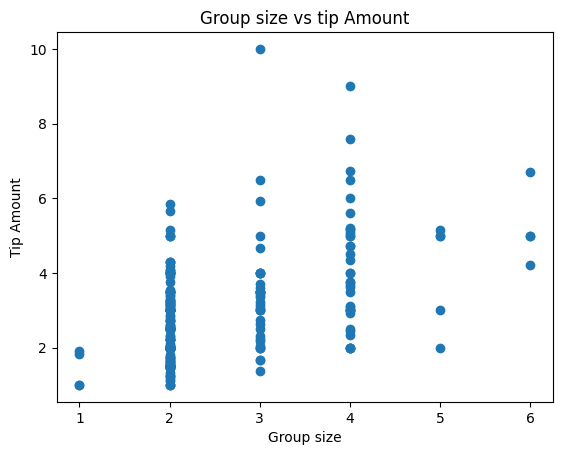

In [34]:
# 	• Does a larger group give higher tips?
plt.scatter(df['size'], df['tip'])
plt.xlabel("Group size")
plt.ylabel("Tip Amount")
plt.title("Group size vs tip Amount")



Text(0.5, 1.0, 'Group size vs tip percentage')

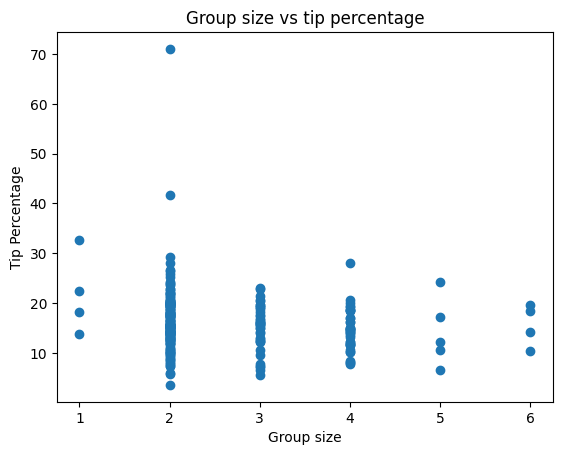

In [35]:
# 	• Does tip percentage increase or decrease with group size?
plt.scatter(df['size'], df['tip_percentage'])
plt.xlabel("Group size")
plt.ylabel("Tip Percentage")
plt.title("Group size vs tip percentage")

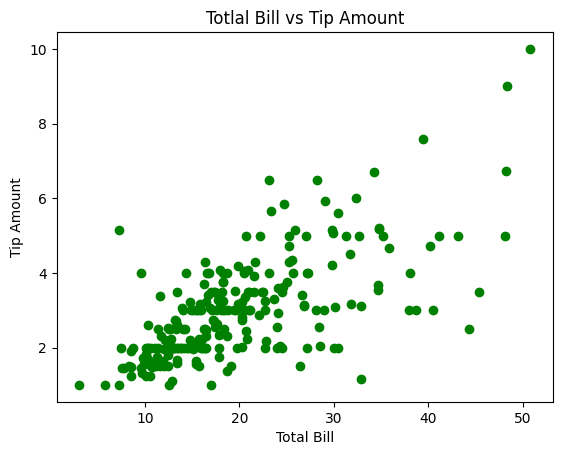

In [36]:
# 	• Scatter plot → total bill vs tip
plt.scatter(df['total_bill'], df['tip'],color='green')
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Totlal Bill vs Tip Amount")
plt.show()

In [37]:
# ✅ 8. Correlation Analysis
# Use a heatmap to explore relations between:
# 	• total_bill
# 	• tip
# 	• tip_percentage
# 	• size
# Questions you can answer:
# 	• Is tip strongly correlated with total bill?
# 	• Does party size affect tip amount?
# ✅ Kaggle loves correlation heatmaps.

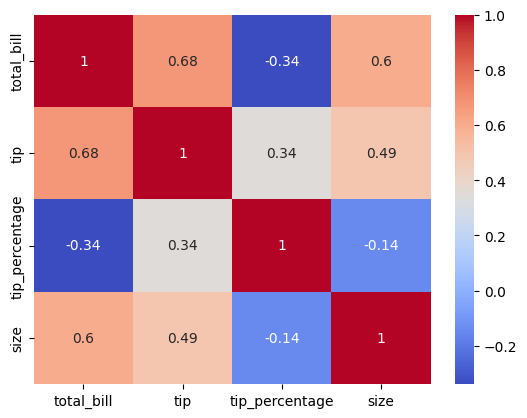

In [38]:
# ✅ 8. Correlation Analysis
# Use a heatmap to explore relations between:
# 	• total_bill
# 	• tip
# 	• tip_percentage
# 	• size
correlation_matrix = df[['total_bill', 'tip', 'tip_percentage','size']].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [39]:
# # Questions you can answer:
# # 	• Is tip strongly correlated with total bill?
# => Yes, tip is strongly correlated with total bill as the correlation coefficient is 0.67 which is greater than 0.6.
# # 	• Does party size affect tip amount?
# => Yes, party size affects tip amount as the correlation coefficient is 0.49 which indicates a moderate positive correlation.

In [40]:
df.to_csv("clean_data.csv", index=False)